<a href="https://colab.research.google.com/github/disarmed3/Simple-Chatty-Bot-/blob/master/predict%20the%20power%20output%20of%20a%20wind%20turbine%20based%20on%20its%20wind%20speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Read CSV file into pandas DataFrame
from google.colab import files
uploaded = files.upload()


Saving T1.csv to T1.csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['T1.csv']))# Dataset is now stored in a Pandas Dataframe

In [9]:
# Print the first 5 rows of the DataFrame
print(df.head())

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  


<Axes: >

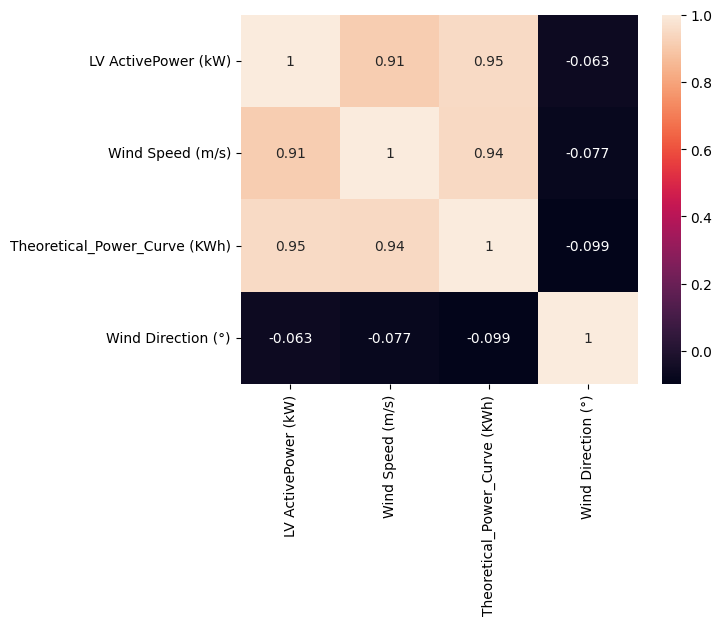

In [10]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, annot=True)


In [11]:
# Check for missing values
print(df.isnull().sum())


Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(['Date/Time', 'LV ActivePower (kW)'], axis=1)
y = df['LV ActivePower (kW)']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Train and evaluate linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred)
print(f"Linear regression MSE: {mse_lr:.2f}")

# Train and evaluate decision tree regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
mse_dt = mean_squared_error(y_val, y_pred)
print(f"Decision tree regression MSE: {mse_dt:.2f}")

# Train and evaluate random forest regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
mse_rf = mean_squared_error(y_val,y_pred)
print(f"Random forest regression MSE: {mse_rf:.2f}")

#Train and evaluate gradient boosting regression

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
mse_gb = mean_squared_error(y_val, y_pred)
print(f"Gradient boosting regression MSE: {mse_gb:.2f}")

Linear regression MSE: 169505.14
Decision tree regression MSE: 288963.61
Random forest regression MSE: 170588.34
Gradient boosting regression MSE: 147059.65


In [20]:
# Train final model on all data
gb = GradientBoostingRegressor()
gb.fit(X, y)

# Load test set and preprocess
df_test = pd.read_csv('T1.csv', parse_dates=['Date/Time'])
X_test = df_test.drop(['Date/Time', 'LV ActivePower (kW)'], axis=1)
X_test = scaler.transform(X_test)

# Make final predictions on test set
y_pred = gb.predict(X_test)

# Save predictions to file
df_test['LV ActivePower (kW)'] = y_pred
df_test.to_csv('predictions.csv', index=False)
df_test.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,350.976799,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,427.268563,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,317.028349,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,414.766494,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,406.718991,5.577941,491.702972,265.674286
